In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = pd.read_excel('/content/datatab (1).xlsx')

In [ ]:
print(data.isnull().sum())

Disease          0
Age              0
Gender           0
Smoker status    0
dtype: int64


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Disease        36 non-null     object
 1   Age            36 non-null     int64 
 2   Gender         36 non-null     object
 3   Smoker status  36 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.3+ KB
None


In [ ]:
data['Disease'] = data['Disease'].map({'diseased': 1, 'not diseased': 0})

In [ ]:
data = pd.get_dummies(data, columns=['Gender', 'Smoker status'], drop_first=True)


In [ ]:
x = data[['Age', 'Gender_Male', 'Smoker status_Smoker']]
y = data['Disease']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2 0]
 [2 4]]

Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.67      0.80         6

    accuracy                           0.75         8
   macro avg       0.75      0.83      0.73         8
weighted avg       0.88      0.75      0.77         8



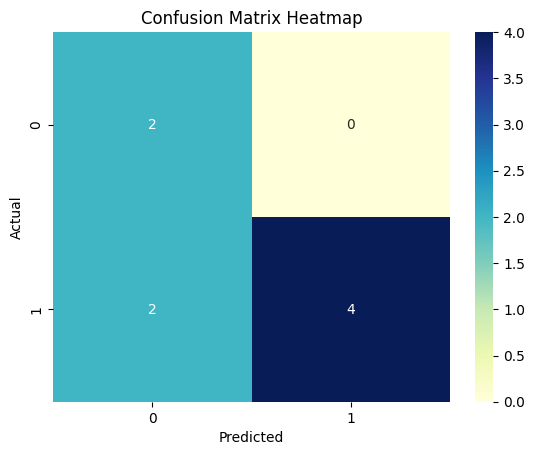

In [ ]:
conf_mat_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix Heatmap')
plt.show()